In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [12]:
import pandas as pd

# Correct the file path and ensure it includes the file extension
file_path = r"D:\datasetsandcodefilesstockmarketprediction\train.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [15]:
# Data Cleaning: Handling Missing and Dublicated Values
df['Postal Code'].fillna(0, inplace = True)
df['Postal Code'] = df['Postal Code'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18644\3325241494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0, inplace = True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [17]:
if df.duplicated().sum()> 0:
    print ("Duplicates exist")
else:
    print ('No dublicates found')

No dublicates found


In [18]:
# Customer Segmentation Analysis: Distribution of Customer Types
types_of_customers = df['Segment'].unique()
print (types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [19]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns = {'Segment' : 'Types of customers'})
print(number_of_customers)

  Types of customers  count
0           Consumer   5101
1          Corporate   2953
2        Home Office   1746


In [20]:
import seaborn as sns

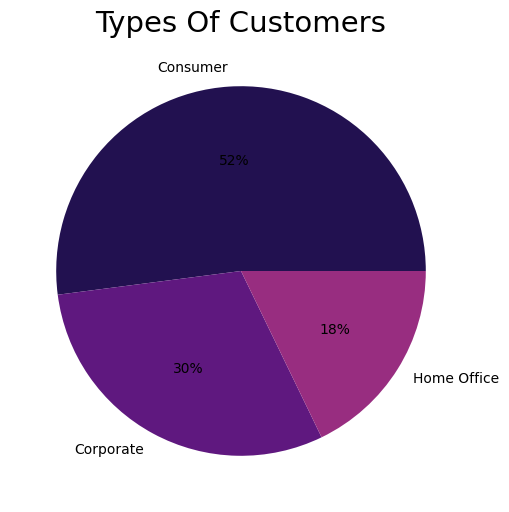

In [21]:
plt.figure(figsize = (10, 6))
plt.title ("Types Of Customers", fontsize = 21 )
color = sns.color_palette ("magma")
plt.pie(number_of_customers['count'], labels=number_of_customers['Types of customers'], colors = color, autopct='%.0f%%')
plt.show()

In [22]:
# Sales Distribution by Customer Segments
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns= {'Segment': 'types_of_customers', 'Sales': 'total_sales'})
print(sales_per_segment)

  types_of_customers   total_sales
0           Consumer  1.148061e+06
1          Corporate  6.884941e+05
2        Home Office  4.249822e+05


<BarContainer object of 3 artists>

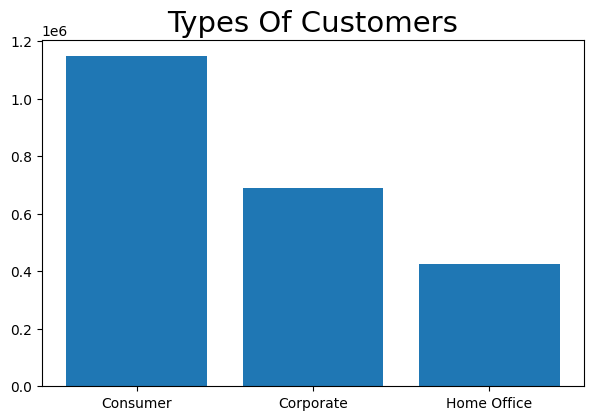

In [23]:
plt.figure(figsize = (7, 4.5))
plt.title ("Types Of Customers", fontsize = 21 )
color = sns.color_palette ("magma")
plt.bar(sales_per_segment['types_of_customers'], sales_per_segment['total_sales'])

In [24]:
# Analysis of Repeat Customer Orders: Identifying Key Segments and Top Buyers
customer_orders = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customer_orders.rename(columns= {'Order ID': 'Total Orders'}, inplace = True)
repeat_customers = customer_orders[customer_orders['Total Orders'] >= 1]
repeat_customers_sorted = repeat_customers.sort_values(by= 'Total Orders', ascending= False)
print(repeat_customers_sorted.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            35
1    PP-18955           Paul Prost  Home Office            34
2    MA-17560         Matt Abelman  Home Office            34
3    JL-15835             John Lee     Consumer            33
4    CK-12205  Chloris Kastensmidt     Consumer            32
5    SV-20365          Seth Vernon     Consumer            32
6    JD-15895     Jonathan Doherty    Corporate            32
7    AP-10915       Arthur Prichep     Consumer            31
8    ZC-21910     Zuschuss Carroll     Consumer            31
9    EP-13915           Emily Phan     Consumer            31


In [25]:
# Top Spenders Analysis and Shipping Mode Distribution
customers_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
top_spenders = customers_sales.sort_values(by = 'Sales', ascending=False)
print (top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


In [26]:
shipping_model = df['Ship Mode'].value_counts().reset_index()
print(shipping_model)

        Ship Mode  count
0  Standard Class   5859
1    Second Class   1902
2     First Class   1501
3        Same Day    538


([<matplotlib.patches.Wedge at 0x25e43684ef0>,
 [Text(-0.3328682142840549, 1.0484267985507356, 'Standard Class'),
  Text(-0.3732753555364641, -1.0347296791670404, 'Second Class'),
  Text(0.7455146923475287, -0.8088311588298078, 'First Class'),
  Text(1.083680807320627, -0.18877475425732734, 'Same Day')],
 [Text(-0.18156448051857538, 0.5718691628458558, '59.8%'),
  Text(-0.20360473938352586, -0.5643980068183856, '19.4%'),
  Text(0.4066443776441065, -0.44118063208898606, '15.3%'),
  Text(0.5910986221748874, -0.102968047776724, '5.5%')])

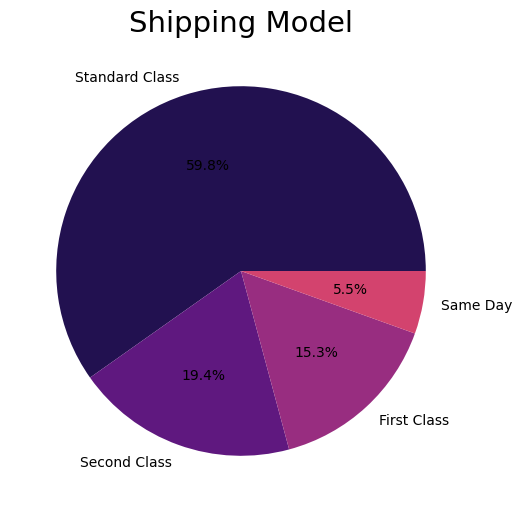

In [27]:
plt.figure(figsize = (10, 6))
plt.title ("Shipping Model", fontsize = 21 )
color = sns.color_palette ("magma")
plt.pie(shipping_model['count'], labels=shipping_model['Ship Mode'], colors = color, autopct='%1.1f%%')

In [28]:
# Geographical Sales Distribution: State and City-Level Insights
state = df['State'].value_counts().reset_index()
print (state.head(15))

             State  count
0       California   1946
1         New York   1097
2            Texas    973
3     Pennsylvania    582
4       Washington    504
5         Illinois    483
6             Ohio    454
7          Florida    373
8         Michigan    253
9   North Carolina    247
10        Virginia    224
11         Arizona    223
12       Tennessee    183
13        Colorado    179
14         Georgia    177


In [29]:
city = df['City'].value_counts().reset_index()
print(city)

              City  count
0    New York City    891
1      Los Angeles    728
2     Philadelphia    532
3    San Francisco    500
4          Seattle    426
..             ...    ...
524      San Mateo      1
525       Cheyenne      1
526         Conway      1
527      Melbourne      1
528     Springdale      1

[529 rows x 2 columns]


In [30]:
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()
top_sales = state_sales.sort_values(by= 'Sales', ascending = False)

In [31]:
print(top_sales.head(15))

             State        Sales
3       California  446306.4635
30        New York  306361.1470
41           Texas  168572.5322
45      Washington  135206.8500
36    Pennsylvania  116276.6500
8          Florida   88436.5320
11        Illinois   79236.5170
20        Michigan   76136.0740
33            Ohio   75130.3500
44        Virginia   70636.7200
31  North Carolina   55165.9640
12         Indiana   48718.4000
9          Georgia   48219.1100
15        Kentucky   36458.3900
1          Arizona   35272.6570


In [32]:
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()
top_city_sales = city_sales.sort_values(by = 'Sales', ascending = False)

In [33]:
print(top_city_sales.head(15))

              City        Sales
327  New York City  252462.5470
265    Los Angeles  173420.1810
450        Seattle  116106.3220
436  San Francisco  109041.1200
372   Philadelphia  108841.7490
207        Houston   63956.1428
80         Chicago   47820.1330
435      San Diego   47521.0290
216   Jacksonville   44713.1830
123        Detroit   42446.9440
462    Springfield   41827.8100
94        Columbus   38662.5630
328         Newark   28448.0490
93        Columbia   25283.3240
215        Jackson   24963.8580


In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [36]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Load the data
df = pd.read_csv(r"D:\datasetsandcodefilesstockmarketprediction\train.csv")

# Aggregate the sales data by state
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()
top_sales = state_sales.sort_values(by='Sales', ascending=False)

# Dictionary mapping state names to their abbreviations
state_abbreviations = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "District of Columbia": "DC",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR",
    "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD",
    "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA",
    "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

# Add a new column with state abbreviations
state_sales['Abbreviation'] = state_sales['State'].map(state_abbreviations)

# Create a choropleth map
fig = px.choropleth(state_sales,
                    locations='Abbreviation',
                    locationmode='USA-states',
                    color='Sales',
                    scope='usa',
                    color_continuous_scale='Blues',
                    title='Total Sales by United States')

fig.show()

In [37]:
# Product Category and Sub-Category Analysis: Identifying Bestsellers
product_SubCategory = df['Sub-Category'].unique()
print(product_SubCategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [38]:
SubCategory_count = df.groupby(['Category'])['Sub-Category'].nunique().reset_index()
print (SubCategory_count)

          Category  Sub-Category
0        Furniture             4
1  Office Supplies             9
2       Technology             4


In [39]:
SubCategory_count_Sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
print(SubCategory_count_Sales)

           Category Sub-Category        Sales
0         Furniture    Bookcases  113813.1987
1         Furniture       Chairs  322822.7310
2         Furniture  Furnishings   89212.0180
3         Furniture       Tables  202810.6280
4   Office Supplies   Appliances  104618.4030
5   Office Supplies          Art   26705.4100
6   Office Supplies      Binders  200028.7850
7   Office Supplies    Envelopes   16128.0460
8   Office Supplies    Fasteners    3001.9600
9   Office Supplies       Labels   12347.7260
10  Office Supplies        Paper   76828.3040
11  Office Supplies      Storage  219343.3920
12  Office Supplies     Supplies   46420.3080
13       Technology  Accessories  164186.7000
14       Technology      Copiers  146248.0940
15       Technology     Machines  189238.6310
16       Technology       Phones  327782.4480


In [40]:
Top_SubCategory_Sales = SubCategory_count_Sales.sort_values(['Sales'], ascending= False).reset_index()
print (Top_SubCategory_Sales.head(10))

   index         Category Sub-Category        Sales
0     16       Technology       Phones  327782.4480
1      1        Furniture       Chairs  322822.7310
2     11  Office Supplies      Storage  219343.3920
3      3        Furniture       Tables  202810.6280
4      6  Office Supplies      Binders  200028.7850
5     15       Technology     Machines  189238.6310
6     13       Technology  Accessories  164186.7000
7     14       Technology      Copiers  146248.0940
8      0        Furniture    Bookcases  113813.1987
9      4  Office Supplies   Appliances  104618.4030


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
Category_count_Sales = df.groupby(['Category'])['Sales'].sum().reset_index()
print(Category_count_Sales)

          Category        Sales
0        Furniture  728658.5757
1  Office Supplies  705422.3340
2       Technology  827455.8730


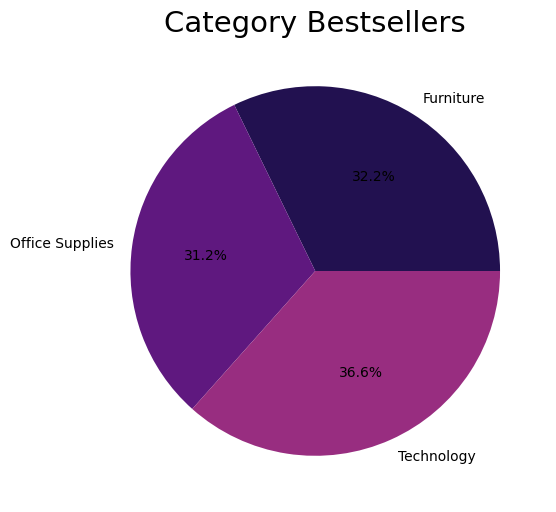

In [43]:
plt.figure(figsize = (10, 6))
color = sns.color_palette("magma")
plt.title("Category Bestsellers", fontsize = 21)
plt.pie(Category_count_Sales['Sales'], labels= Category_count_Sales['Category'], colors= color, autopct= '%1.1f%%')
plt.show()

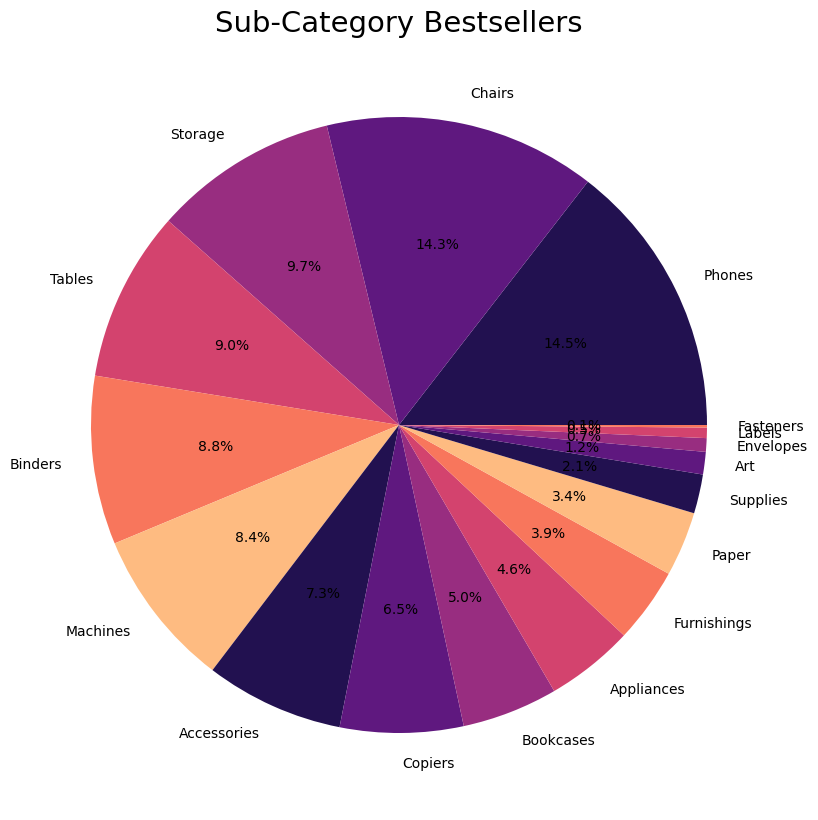

In [44]:
plt.figure(figsize = (10, 10))
color = sns.color_palette("magma")
plt.title("Sub-Category Bestsellers", fontsize = 21)
plt.pie(Top_SubCategory_Sales['Sales'], labels= Top_SubCategory_Sales['Sub-Category'], colors= color, autopct= '%1.1f%%')
plt.show()

<BarContainer object of 17 artists>

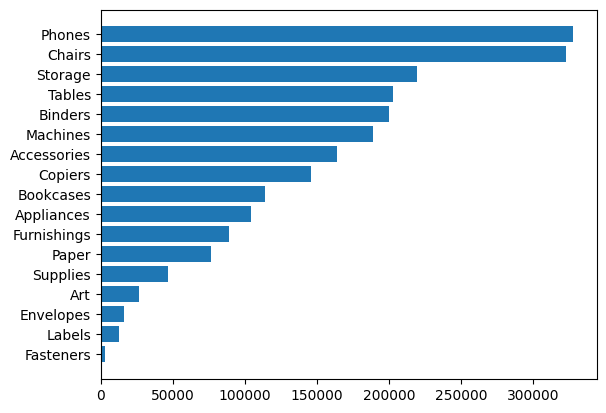

In [45]:
Top_SubCategory_Sales = SubCategory_count_Sales.sort_values(['Sales'], ascending= True)
plt.barh(Top_SubCategory_Sales['Sub-Category'], Top_SubCategory_Sales['Sales'])

In [47]:
# Orders over the years
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst =True)
Yearly_Sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
Yearly_Sales = Yearly_Sales.reset_index()
print(Yearly_Sales)

   Order Date        Sales
0        2015  479856.2081
1        2016  459436.0054
2        2017  600192.5500
3        2018  722052.0192


<BarContainer object of 4 artists>

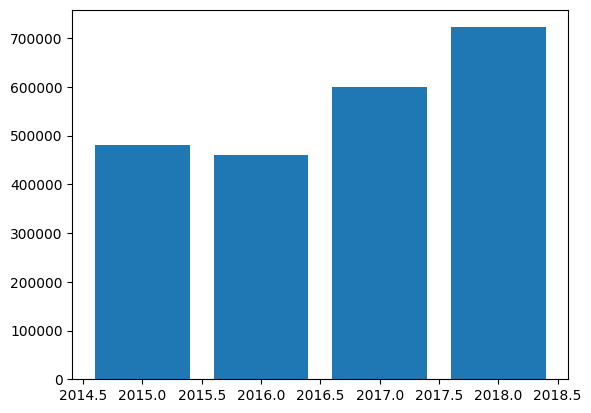

In [48]:
plt.bar(Yearly_Sales['Order Date'], Yearly_Sales['Sales'])

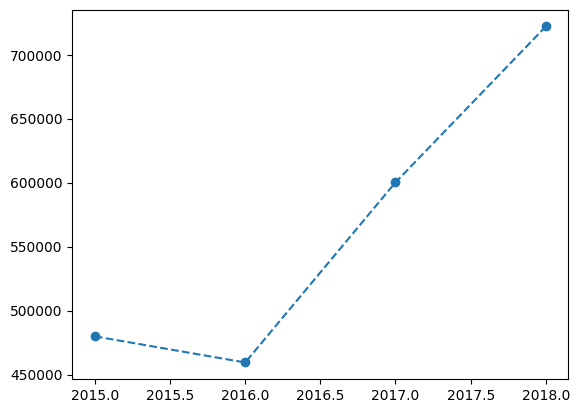

In [49]:
plt.plot(Yearly_Sales['Order Date'], Yearly_Sales['Sales'], marker = 'o', linestyle = '--')